# Project Details

**DOMAIN** : Telecom

**CONTEXT** :  A  telecom  company  wants  to  use  their  historical  customer  data  and  leverage  machine  learning  to  predict  behaviour  in  an  attempt 
to retain customers. The end goal is to develop focused customer retention programs 

**DATA  DESCRIPTION** :  Each  row  represents  a  customer,  each  column  contains  customer’s  attributes  described  on  the  column  Metadata.  The 
data set includes information about:
 - Customers who left within the last month – the column is called Churn 
 - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies 
 - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges 
 - Demographic info about customers – gender, age range, and if they have partners and dependents 

**PROJECT  OBJECTIVE** :  The  objective,  as  a  data  scientist  hired  by  the  telecom  company,  is  to  build  a  model  that  will  help  to  identify  the 
potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer 
churn and will increase the focus on strategising customer retention.

## Steps and Tasks

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

%matplotlib inline
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True)

### 1. Data Understanding & Exploration: [5 Marks] 
<ol style="list-style-type: upper-alpha;">
  <li>Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]</li>
  <li>Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]</li>
  <li>Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark] </li>
  <li>Print DataTypes of all the 3 DataFrames. [1 Mark]</li>
  <li>Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]</li>
</ol>

In [2]:
#Data understaning and exploration

#A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.
df_telco1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [3]:
#B.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. 
df_telco2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [4]:
#C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
df_telco = pd.merge(df_telco1, df_telco2, on="customerID")

In [5]:
#D.Print DataTypes of all the 3 DataFrames.
df_telco1.info()
df_telco2.info()
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   D

In [6]:
#E. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

# Column names in df_telco1
df_telco1_columns = list(df_telco1.columns)

# Column names in df_telco2
df_telco2_columns = list(df_telco2.columns)

# Remove 'customerID' from the list as it is repeated
del df_telco2_columns[0]

# Combine columns from both dataframes
all_columns = df_telco1_columns + df_telco2_columns

# Column names in merged dataframe df_telco
df_telco_columns = list(df_telco.columns)

# Verify if all the columns are incorporated in the merged DataFrame by using simple
# comparison Operator in Python.
if df_telco_columns == all_columns:
    print("All Columns Incorporated!")
else:
    print("Some columns are missing.")

All Columns Incorporated!


### 2. Data Cleaning & Analysis: [15 Marks] 
<ol style="list-style-type: upper-alpha;">
  <li>Impute missing/unexpected values in the DataFrame. [2 Marks] 
  <li>Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks] 
  <br>[For Example: MonthlyCharges, TotalCharges]</li>
  <li>Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks] </li>
  <li>Share insights for Q2.c. [2 Marks] </li>
  <li>Encode all the appropriate Categorical features with the best suitable approach. [2 Marks] </li>
  <li> Split the data into 80% train and 20% test. [1 Marks] </li> 
  <li>Normalize/Standardize the data with the best suitable approach. [2 Marks] </li>

</ol>

In [7]:
#Data cleaning and analysis

# A.Impute missing/unexpected values in the DataFrame. 

#First, check datatypes of all columns

df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:

# The datatype of 'TotalCharges' is unexpected, it should be 'float;
# Let's examine the values of this column to find out any unexpected values like '' or ' '

for row_value in df_telco['TotalCharges']:
    if row_value == '' or row_value == ' ':
        print("Unexpected value '{}'".format(row_value))




Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '
Unexpected value ' '


In [9]:
# Replace empty places ' ' above with NaN
df_telco['TotalCharges'] = df_telco['TotalCharges'].replace(' ',np.nan)

#Now Check for missing values in the merged dataframe
df_telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# There are 11 empty values in the column 'TotalCharges'
# Check for different unexpected categories in other columns
for col in df_telco.columns:
    temp = df_telco[col].value_counts()
    print(temp)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    15

In [11]:
# Drop empty values from the dataframe
df_telco = df_telco.dropna(axis=0).reset_index()
df_telco.isnull().sum()

index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# B.Make sure all the variables with continuous values are of ‘Float’ type. 
#    [For Example: MonthlyCharges, TotalCharges]

#Check the datatypes of all columns
df_telco.dtypes

index                 int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# First, let's convert the columns with an 'object' datatype into categorical variables
for feature in df_telco.columns: # Loop through all columns in the dataframe
    if df_telco[feature].dtype == 'object': # Only apply for columns withcategorical strings
        df_telco[feature] = pd.Categorical(df_telco[feature]) # Replace strings with an integer

df_telco.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [14]:
# CustomerID is not a category, change it back to string
df_telco.customerID = df_telco.customerID.astype(object)
df_telco.dtypes

index                  int64
customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [15]:
# 'SeniorCitizen' is also a category. Let's change it.
df_telco['SeniorCitizen'] = pd.Categorical(df_telco.SeniorCitizen)
df_telco.dtypes

index                  int64
customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [16]:
# Change datatype of 'TotalCharges' to float
df_telco.TotalCharges = df_telco.TotalCharges.astype(float)
df_telco.dtypes

index                  int64
customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

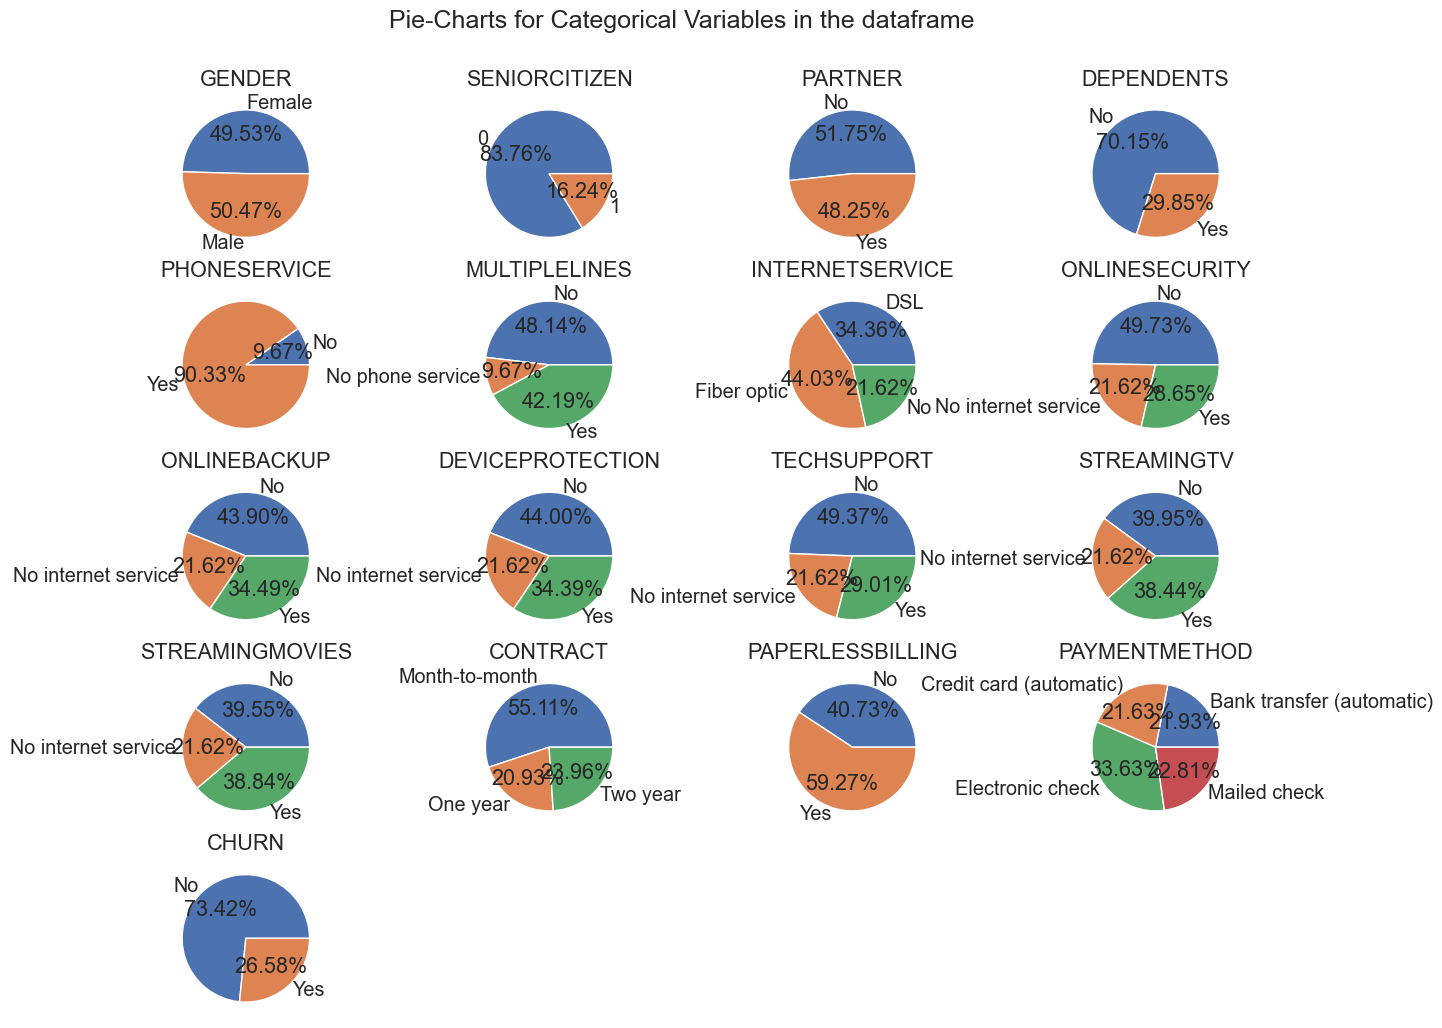

In [17]:
#C.Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. 

#Function to plot Pie-Charts for all categorical variables in the dataframe
def plot_piechart(df,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

plot_piechart(df_telco, 4)

##### D. Insights from above (2C)
 1. Gender is equally balanced between Male and Female
 2. There are lesser senior citizens in the dataset
 3. The Partners category is equally distributed between those having partners andthose not having partners
 4. Most people do not have dependents
 5. 90% people have Phone Service
 6. Among those having phone service, 42% have multiple lines
 7. 44% people have Fiber optic internet service
 8. 50% people have Online Security
 9. 44% people don't have an online backup
 10. 44% people have no device protection
 11. 50% people don't get tech support
 12. People streaming TV and not streaming TV are almost equal
 13. People streaming movies and not streaming movies are almost equal
 14. Maximum people (55%) prefer month-to-month contract
 15. Maximum people prefer paperless billing
 16. 33% people prefer electronic checks to make payments. Other payment methods are almost equally distributed
 17. Majority (73%) people did not churn

In [18]:
#E.Encode all the appropriate Categorical features with the best suitable approach. 
df = df_telco
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Drop 'index' and 'customerID' columns
df.drop(columns=['index', 'customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Independent Variables
X = df.drop(columns=['Churn'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [21]:
# Encode categorical variables
# Using Get Dummies method
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [22]:
# Dependent/Target Variable
y = df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: category
Categories (2, object): ['No', 'Yes']

In [23]:
#F. Split the data into 80% train and 20% test. [1 Marks] 

# Splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=.20, random_state=10)
X_train.shape, X_test.shape

((5625, 30), (1407, 30))

In [24]:
#G.Normalize/Standardize the data with the best suitable approach.

# Standardize Training Data

# Import Library
from sklearn.preprocessing import StandardScaler

# Define method
scaler = StandardScaler()

# Perform standardization
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns =X_train.columns)

X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.297499,0.861739,-0.978569,0.980109,-0.443918,-0.967979,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
1,-0.521791,0.840135,-0.233205,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
2,1.560372,1.072790,2.036780,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,-0.531223,1.414779,-0.541665
3,1.356239,-1.178976,-0.141853,0.980109,-0.443918,-0.967979,-0.659507,-3.059267,3.059267,-0.858594,...,-0.525166,-0.794595,-0.525166,-0.801159,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
4,-0.399311,0.870048,-0.046720,-1.020295,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


In [25]:
# Standardize Test Data
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.072697,-1.478104,-0.736393,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,-0.531223,-0.706824,1.846160
1,1.601199,-1.326878,-0.201081,-1.020295,-0.443918,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,1.882450,-0.706824,-0.541665
2,-0.766751,-0.193517,-0.677010,-1.020295,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,-0.525166,-0.794595,-0.525166,1.248191,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
3,-0.480964,-1.494722,-0.834621,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,-0.561404,0.822862,-0.531223,-0.706824,1.846160
4,1.601199,0.637393,1.691601,-1.020295,2.252668,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


### 3. Model building and performance improvement : [40 Marks] 
<ol style="list-style-type: upper-alpha;">
  <li>Train a model using Decision tree and check the performance of the model on train and test data ( 4 marks ) </li>
  <li>Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.a and Q3.b ( 5 marks ) </li> 
  <li>Train a model using Random forest  and check the performance of the model on train and test data ( 4 marks ) </li>
  <li>Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.c and Q3.d ( 5 marks ) </li> 
  <li>Train a model using Adaboost and check the performance of the model on train and test data ( 4 marks ) </li>
  <li>Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.e and Q3.f ( 5 marks ) </li> 
  <li>Train a model using GradientBoost and check the performance of the model on train and test data ( 4 marks ) </li>
  <li>Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide 
the differences observed in performance in Q3.g and Q3.h ( 5 marks )</li> 
  <li>Provide detailed analysis of the below steps  (4 marks ) : 
    <ol>
      <li>Compare the performance of each model in train stage  and test stage</li> 
      <li>Provide your observation on which model performed the best </li>
      <li>Provide your reasoning on why the model performed best </li>
      <li>Provide your final conclusion on your observation </li>
</ol>
</li>

</ol>

Confusion metrics (Training Data): 
 [[4116    1]
 [  11 1497]]




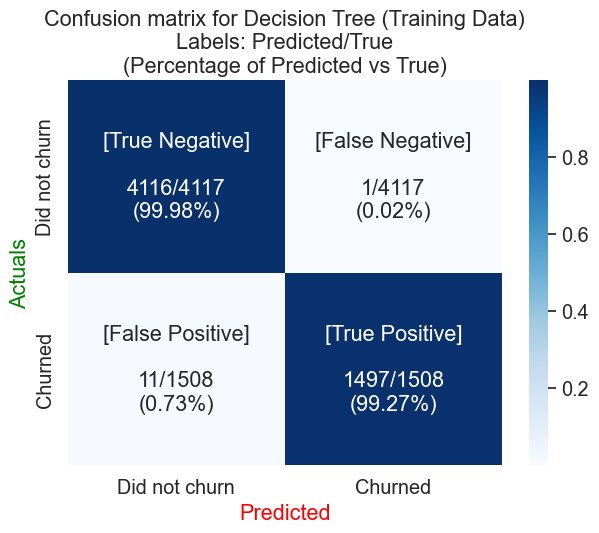

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      4117
         Yes       1.00      0.99      1.00      1508

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625





Confusion metrics (Test Data): 
 [[848 198]
 [185 176]]




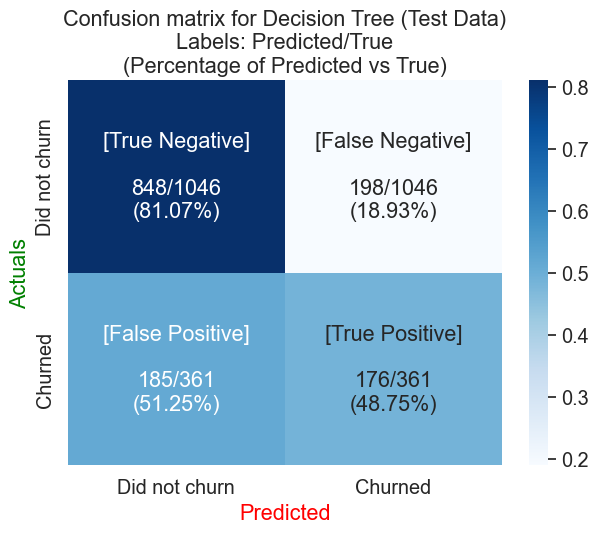

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.82      0.81      0.82      1046
         Yes       0.47      0.49      0.48       361

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407





In [26]:
#Model building

#A. Train a model using Decision tree and check the performance of the model on train and test data


#Plot Confusion metrics
def plot_cm(cm, y_test, title):
    true_no_churn=y_test.value_counts()[0]
    true_churn=y_test.value_counts()[1]

    trues = [true_no_churn,true_no_churn,true_churn,true_churn]
    pred_pct = ["{0:.2%}".format(value) for value in
                         cm.flatten()/trues]

    tags = ['True Negative', 'False Negative', 'False Positive', 'True Positive']

    ax_labels = ["Did not churn","Churned"]

    df_cm = pd.DataFrame((cm.flatten()/trues).reshape(2,2), index = [i for i in ax_labels],
                  columns = [i for i in ax_labels])


    fig=plt.figure(figsize = (7,5))
    ax = fig.add_subplot()

    counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    labels = [f"[{v4}]\n\n{v1}/{v3}\n({v2})" for v1, v2, v3, v4 in
              zip(counts,pred_pct, trues, tags)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(df_cm, annot=labels ,fmt='', cmap='Blues')

    plt.title('{0}\nLabels: Predicted/True\n(Percentage of Predicted vs True)'.format(title))
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('green')

    plt.show()

def fit_model_n_print_metric(model, name):

    #Train the model using the training sets

    model.fit(X_train, y_train)

    #Check the performance of the model on train and test data


    #Training data metrics
    y_pred = model.predict(X_train)
    cm = metrics.confusion_matrix(y_train, y_pred)
    print('Confusion metrics (Training Data): \n', cm)
    print('\n')

    plot_cm(cm, y_train, "Confusion matrix for {} (Training Data)".format(name))

    print('Classification Report (Training Data):  \n', metrics.classification_report(y_train, y_pred))
    print('\n')

    print()
    print()

    #Test Data Metrics

    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    print('Confusion metrics (Test Data): \n', cm)
    print('\n')

    plot_cm(cm, y_test, "Confusion matrix for {} (Test Data)".format(name))

    print('Classification Report (Test Data):  \n', metrics.classification_report(y_test, y_pred))
    print('\n')

#Import library
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree Classifier 
decision_tree = DecisionTreeClassifier(random_state = 1)
fit_model_n_print_metric(decision_tree, "Decision Tree")

Confusion metrics (Training Data): 
 [[3723  394]
 [ 767  741]]




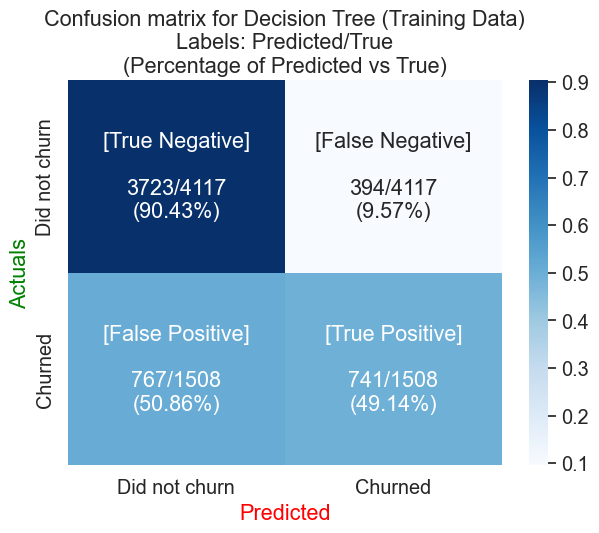

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       0.83      0.90      0.87      4117
         Yes       0.65      0.49      0.56      1508

    accuracy                           0.79      5625
   macro avg       0.74      0.70      0.71      5625
weighted avg       0.78      0.79      0.78      5625





Confusion metrics (Test Data): 
 [[926 120]
 [171 190]]




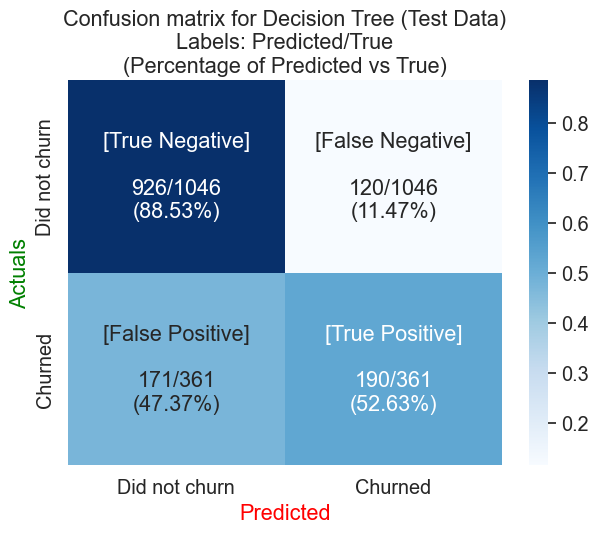

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.84      0.89      0.86      1046
         Yes       0.61      0.53      0.57       361

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Comparison with base model:


,Model Name,Accuracy Score (Train),Recall Score (Churn = Yes) (Train),Accuracy Score (Test),Recall Score (Churn = Yes) (Test)
0,Decision Tree (Base Model),0.997867,0.992706,0.727790,0.487535
1,Decision Tree (Tuned Model),0.793600,0.491379,0.793177,0.526316


In [27]:
#B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , 
# provide the differences observed in performance in Q3.a and Q3.b

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score
from IPython.display import display

# A function to collect results of models
def add_result(dataframe, model_name, acc_score_train, recall_score_train, acc_score_test, recall_score_test):

    # Create a new DataFrame with the row_values
    new_row = pd.DataFrame({'Model Name': [model_name],
        'Accuracy Score (Train)': [acc_score_train],
        'Recall Score (Churn = Yes) (Train)': [recall_score_train],
        'Accuracy Score (Test)': [acc_score_test],
        'Recall Score (Churn = Yes) (Test)': [recall_score_test]}
    )

    # Concatenate the new row with the original DataFrame
    updated_dataframe = pd.concat([dataframe, new_row], ignore_index=True)

    return updated_dataframe

#Store resuts here
# Create a results DataFrame
data = {'Model Name': [],
        'Accuracy Score (Train)': [],
        'Recall Score (Churn = Yes) (Train)': [],
        'Accuracy Score (Test)': [],
        'Recall Score (Churn = Yes) (Test)': []}

results = pd.DataFrame(data)

def search_best_model_n_print(model, parameters, name, base_model, results):

    #We will use accuracy as measure of best score
    acc_scorer = make_scorer(accuracy_score)

    #Grid Search
    grid_search = GridSearchCV(model,parameters,scoring=acc_scorer,cv=5)
    grid_search.fit(X_train,y_train)

    #Set the best estimator
    model_tuned = grid_search.best_estimator_
    

    #Fit the best model
    model_tuned.fit(X_train,y_train)

    #Show performances

    y_pred = model_tuned.predict(X_train)
    cm = metrics.confusion_matrix(y_train, y_pred)
    print('Confusion metrics (Training Data): \n', cm)
    print('\n')

    plot_cm(cm, y_train, "Confusion matrix for {} (Training Data)".format(name))

    print('Classification Report (Training Data):  \n', metrics.classification_report(y_train, y_pred))
    print('\n')

    acc_score_train = metrics.accuracy_score(y_train, y_pred)
    recall_score_train = metrics.recall_score(y_train, y_pred, pos_label="Yes")


    print()
    print()

    #Test Data Metrics

    y_pred = model_tuned.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    print('Confusion metrics (Test Data): \n', cm)
    print('\n')

    plot_cm(cm, y_test, "Confusion matrix for {} (Test Data)".format(name))

    print('Classification Report (Test Data):  \n', metrics.classification_report(y_test, y_pred))
    print('\n')

    acc_score_test = metrics.accuracy_score(y_test, y_pred)
    recall_score_test = metrics.recall_score(y_test, y_pred, pos_label="Yes")

    print("Comparison with base model:")

    data = {'Model Name': [name + " (Base Model)", name + " (Tuned Model)"],
        'Accuracy Score (Train)': [metrics.accuracy_score(y_train, base_model.predict(X_train)), acc_score_train],
        'Recall Score (Churn = Yes) (Train)': [metrics.recall_score(y_train, base_model.predict(X_train), pos_label="Yes"), recall_score_train],
        'Accuracy Score (Test)': [metrics.accuracy_score(y_test, base_model.predict(X_test)), acc_score_test],
        'Recall Score (Churn = Yes) (Test)': [metrics.recall_score(y_test, base_model.predict(X_test), pos_label="Yes"), recall_score_test]}

    display(pd.DataFrame(data))
    

    return add_result(results, name, acc_score_train, recall_score_train, acc_score_test, recall_score_test)


#Parameters to choose from
parameters = {
                'criterion':['gini','entropy'],
                #'splitter':['best','random'],
                'max_depth':[2,4,6,8,10,12]
                #'min_samples_split':[2,3,4,5,6,7,8,9,10],
                #'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
                #'max_features':['auto','sqrt','log2'],
                #'max_leaf_nodes':[2,3,4,5,6,7,8,9,10]    
            }


results = search_best_model_n_print(DecisionTreeClassifier(random_state=1),parameters, "Decision Tree", decision_tree, results) 

- Base model is overfitted
- Tuned model is better test data accuracy and recall of Churn = Yes

Confusion metrics (Training Data): 
 [[4110    7]
 [   5 1503]]




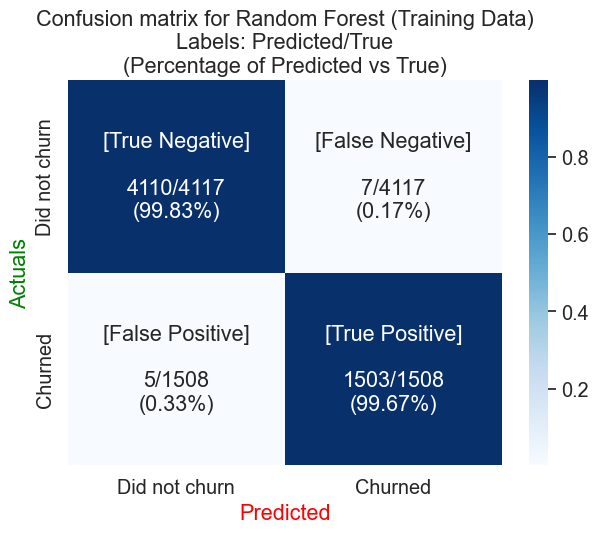

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      4117
         Yes       1.00      1.00      1.00      1508

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625





Confusion metrics (Test Data): 
 [[922 124]
 [159 202]]




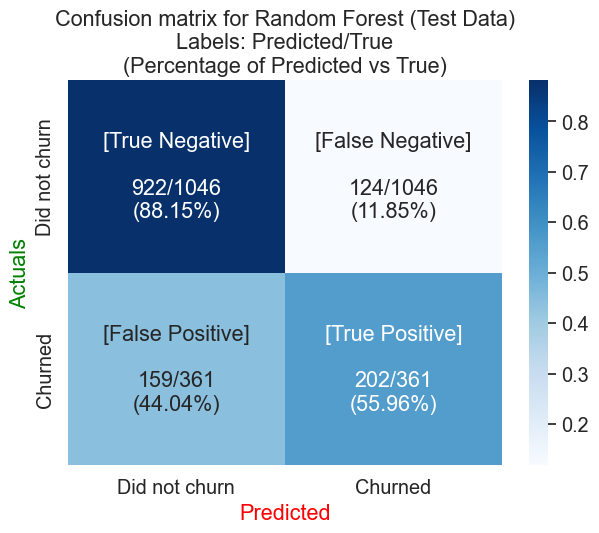

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.85      0.88      0.87      1046
         Yes       0.62      0.56      0.59       361

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407





In [28]:
#C. Train a model using Random forest  and check the performance of the model on train and test data

#Import library
from sklearn.ensemble import RandomForestClassifier

#Create Decision Tree Classifier 
random_forest = RandomForestClassifier(random_state = 1) 
fit_model_n_print_metric(random_forest, "Random Forest")

Confusion metrics (Training Data): 
 [[3871  246]
 [ 563  945]]




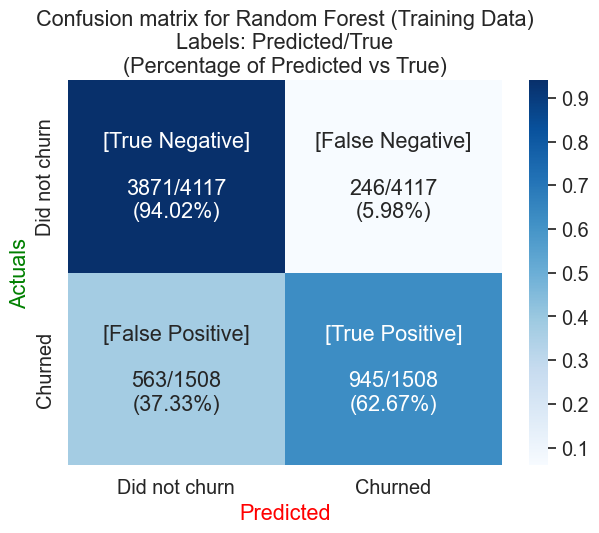

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       0.87      0.94      0.91      4117
         Yes       0.79      0.63      0.70      1508

    accuracy                           0.86      5625
   macro avg       0.83      0.78      0.80      5625
weighted avg       0.85      0.86      0.85      5625





Confusion metrics (Test Data): 
 [[935 111]
 [157 204]]




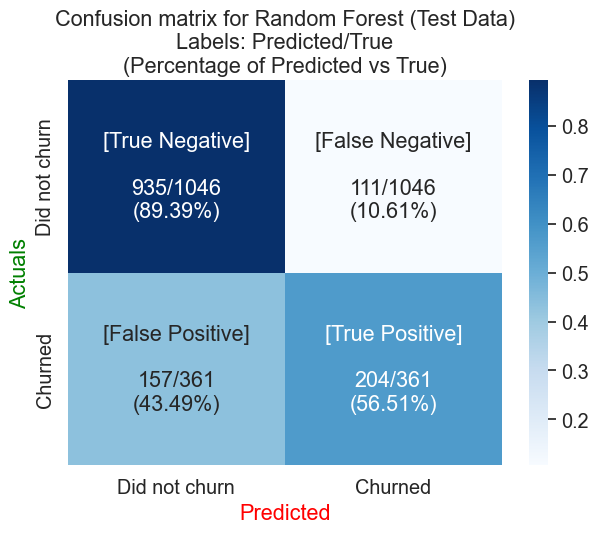

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.86      0.89      0.87      1046
         Yes       0.65      0.57      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



Comparison with base model:


,Model Name,Accuracy Score (Train),Recall Score (Churn = Yes) (Train),Accuracy Score (Test),Recall Score (Churn = Yes) (Test)
0,Random Forest (Base Model),0.997867,0.996684,0.798863,0.559557
1,Random Forest (Tuned Model),0.856178,0.626658,0.809524,0.565097


In [29]:
#D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , 
# provide the differences observed in performance in Q3.c and Q3.d

#Parameters to choose from
parameters = {
    'bootstrap': [True],
    'max_depth': [2,4,6,8,10,12],
    'max_features': ['sqrt', 'log2'],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    #'n_estimators': [100, 200, 300, 1000]
}

results = search_best_model_n_print(RandomForestClassifier(random_state=1),parameters, "Random Forest",random_forest, results) 

- Base model is overfitted
- Tuned model has better accuracy in recall for test 

Confusion metrics (Training Data): 
 [[3715  402]
 [ 667  841]]




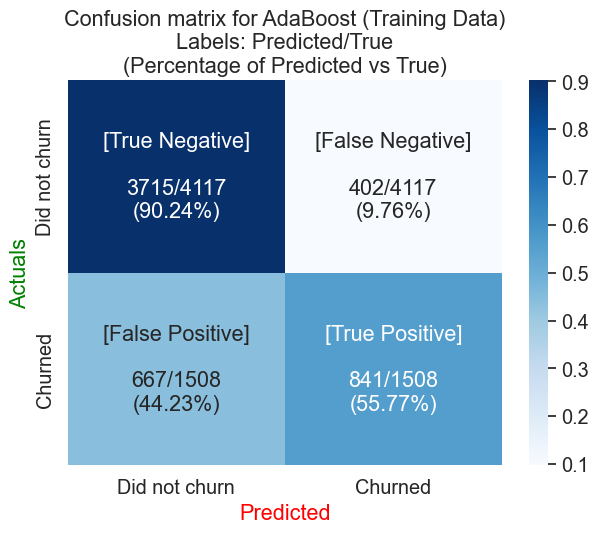

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       0.85      0.90      0.87      4117
         Yes       0.68      0.56      0.61      1508

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625





Confusion metrics (Test Data): 
 [[937 109]
 [156 205]]




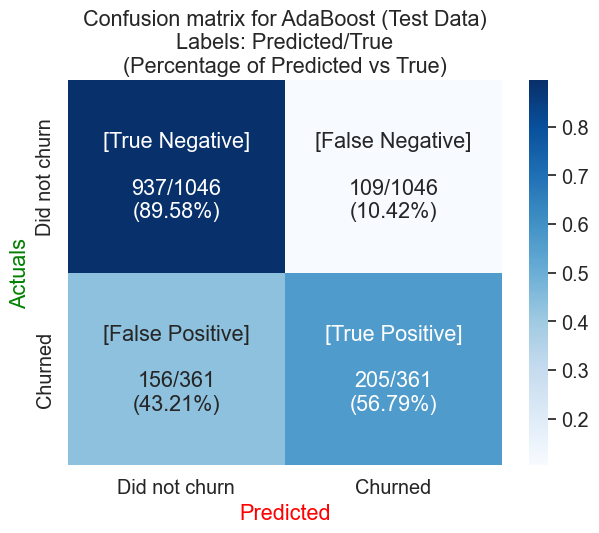

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1046
         Yes       0.65      0.57      0.61       361

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407





In [30]:
#E. Train a model using Adaboost and check the performance of the model on train and test data 

#Import library
from sklearn.ensemble import AdaBoostClassifier

#Create Decision Tree Classifier 
adaboost = AdaBoostClassifier(random_state = 1) 
fit_model_n_print_metric(adaboost, "AdaBoost")

Confusion metrics (Training Data): 
 [[3719  398]
 [ 684  824]]




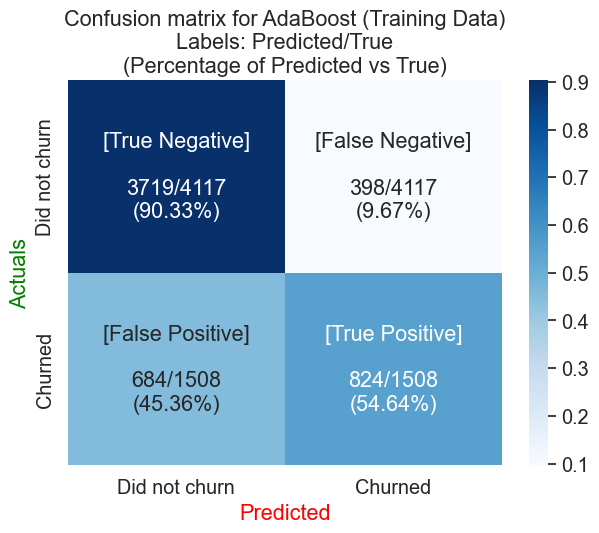

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      4117
         Yes       0.67      0.55      0.60      1508

    accuracy                           0.81      5625
   macro avg       0.76      0.72      0.74      5625
weighted avg       0.80      0.81      0.80      5625





Confusion metrics (Test Data): 
 [[936 110]
 [152 209]]




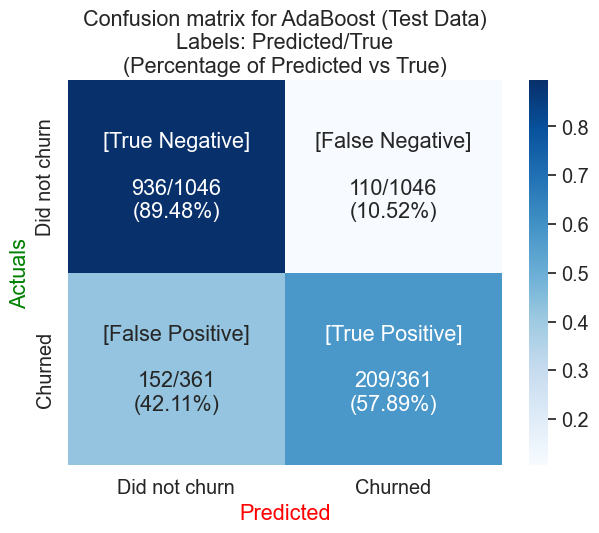

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.86      0.89      0.88      1046
         Yes       0.66      0.58      0.61       361

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407



Comparison with base model:


,Model Name,Accuracy Score (Train),Recall Score (Churn = Yes) (Train),Accuracy Score (Test),Recall Score (Churn = Yes) (Test)
0,AdaBoost (Base Model),0.809956,0.557692,0.811656,0.567867
1,AdaBoost (Tuned Model),0.807644,0.546419,0.813788,0.578947


In [31]:
#F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , 
# provide the differences observed in performance in Q3.e and Q3.f 

#Parameters to choose from
parameters = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    }

results = search_best_model_n_print(AdaBoostClassifier(random_state=1),parameters, "AdaBoost",adaboost, results) 
  

- Base model and tuned model performed similarly
- There is slight improvement in the tuned model

Confusion metrics (Training Data): 
 [[3783  334]
 [ 656  852]]




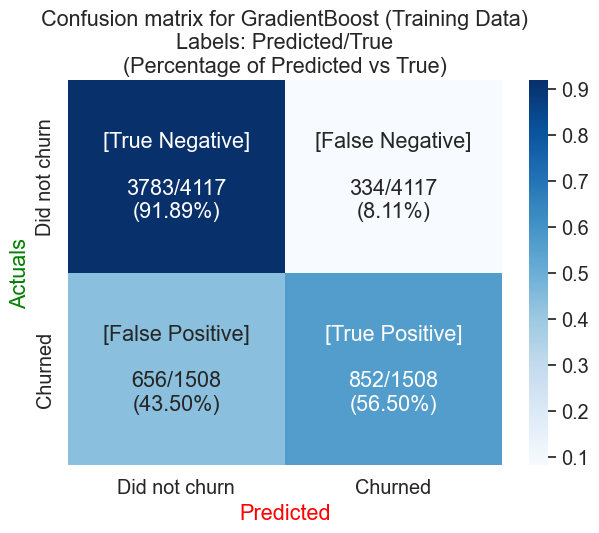

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       0.85      0.92      0.88      4117
         Yes       0.72      0.56      0.63      1508

    accuracy                           0.82      5625
   macro avg       0.79      0.74      0.76      5625
weighted avg       0.82      0.82      0.82      5625





Confusion metrics (Test Data): 
 [[934 112]
 [159 202]]




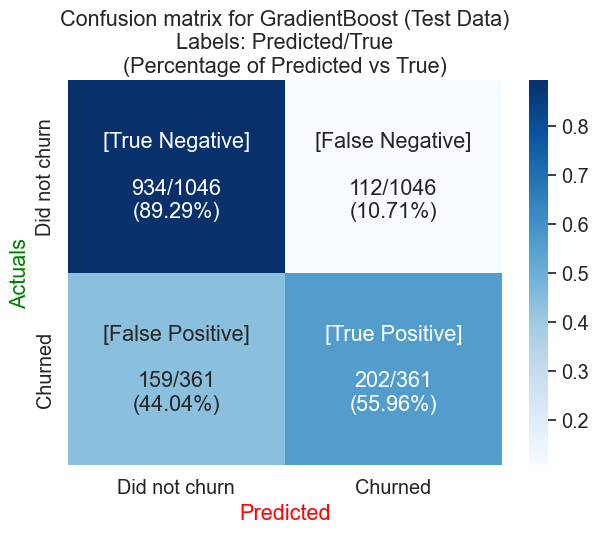

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.85      0.89      0.87      1046
         Yes       0.64      0.56      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407





In [32]:
#G. Train a model using GradientBoost and check the performance of the model on train and test data 

#Import library
from sklearn.ensemble import GradientBoostingClassifier

#Create Decision Tree Classifier 
gradientboost = GradientBoostingClassifier(random_state = 1) 
fit_model_n_print_metric(gradientboost, "GradientBoost")

Confusion metrics (Training Data): 
 [[3749  368]
 [ 650  858]]




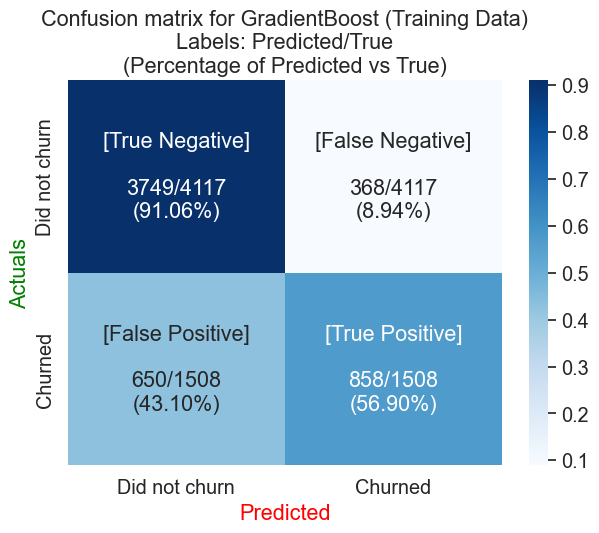

Classification Report (Training Data):  
               precision    recall  f1-score   support

          No       0.85      0.91      0.88      4117
         Yes       0.70      0.57      0.63      1508

    accuracy                           0.82      5625
   macro avg       0.78      0.74      0.75      5625
weighted avg       0.81      0.82      0.81      5625





Confusion metrics (Test Data): 
 [[932 114]
 [149 212]]




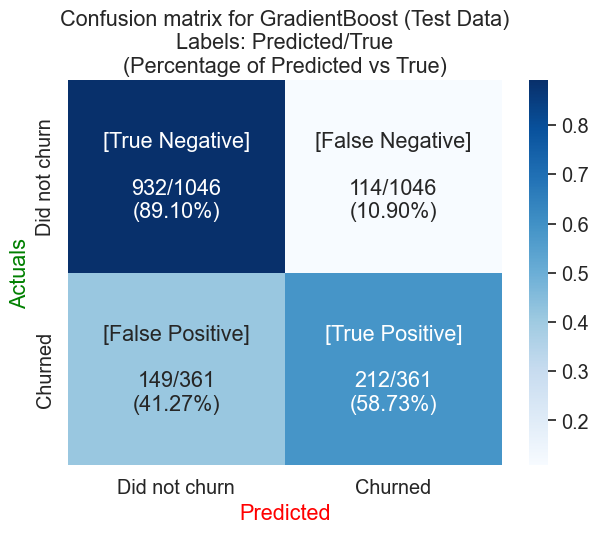

Classification Report (Test Data):  
               precision    recall  f1-score   support

          No       0.86      0.89      0.88      1046
         Yes       0.65      0.59      0.62       361

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407



Comparison with base model:


,Model Name,Accuracy Score (Train),Recall Score (Churn = Yes) (Train),Accuracy Score (Test),Recall Score (Churn = Yes) (Test)
0,GradientBoost (Base Model),0.824000,0.564987,0.807392,0.559557
1,GradientBoost (Tuned Model),0.819022,0.568966,0.813077,0.587258


In [33]:
#H. Use grid search and improve the performance of the GradientBoost model , 
# check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h 

#Parameters to choose from
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
parameters = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3]
    }


results = search_best_model_n_print(GradientBoostingClassifier(random_state=1),parameters, "GradientBoost",gradientboost, results) 


- Here too, base and tuned models gave similar performaces
- Tuned model is better though

In [34]:
#I. Provide detailed analysis 

# Compare the performance of each model in train stage  and test stage 
display(results)

,Model Name,Accuracy Score (Train),Recall Score (Churn = Yes) (Train),Accuracy Score (Test),Recall Score (Churn = Yes) (Test)
0,Decision Tree,0.793600,0.491379,0.793177,0.526316
1,Random Forest,0.856178,0.626658,0.809524,0.565097
2,AdaBoost,0.807644,0.546419,0.813788,0.578947
3,GradientBoost,0.819022,0.568966,0.813077,0.587258


#### Observation on which model performed the best 

- Based on Test Accuracy, AdaBoost performed based, though GradientBoost was very close second
- Based on predicting customer churn = Yes (True postivies), GradientBoost performed best

#### Reasoning on why the model performed best 

- Gradient Boosting often outperforms AdaBoost, RandomForest, or a single Decision Tree in many machine learning tasks due to its ensemble nature and the way it addresses some of the limitations of these other methods Here are some reasons why Gradient Boosting works better:

     - **Sequential Learning**: Gradient boosting gradually gives weaker learners (usually decision trees), with each new learner focusing on mistakes made by previous ones. This allows the model to continually improve and adapt to the data, potentially improving performance compared to Decision Tree.

     - **Model Complexity**:  Gradient boosting can handle more complex relationships in data because it can combine many weak learners to create a complex model. In contrast, a decision tree can be very simple, and AdaBoost may not handle complex cases so well.

     - **Robust to Overfitting**: Gradient Boosting typically involves standard techniques such as tree depth constraints and shrinkage (learning rate). This helps prevent excessive support, which can be a problem with Decision Trees, especially when deep. RandomForest also reduces overfitting but may not be as effective as Gradient Boosting.

     - **Bias-Variance Trade-off**:  Gradient-boosting achieves a balance between bias and variance within its cluster by reducing bias by adding additional models and properly weighting it to reduce variance This trade-off is common for a model more robust and more accurate results compared to RandomForest , which has more variance to fit.

     - **Adaptive Learning**: The gradient descent-based optimization in Gradient Boosting allows it to adaptively assign more weight to difficult-to-predict instances, which helps in capturing complex decision boundaries. AdaBoost also assigns weights to instances but might not adapt as well as Gradient Boosting in every scenario.

     - **Feature Importance**: Gradient Boosting provides feature importance scores, which can be helpful in understanding the importance of different features in the dataset. This information is not as readily available with AdaBoost and can be harder to interpret with RandomForest.

#### Final conclusion 

I recommend to use GradientBoosting algorithm here based on above result.

However, it is important to note that the choice of the best algorithm depends on the specific problem and dataset. RandomForest and AdaBoost can still perform well in many scenarios, especially when the data has simple patterns, or when you want a more interpretable model (e.g., AdaBoost's focus on misclassified instances). Therefore, it's recommended to try multiple algorithms and evaluate their performance on the given task to determine the best approach.
